## Titanic Dataset Analytics and visualization



The analysis was conducted using a Jupyter notebook created with Python and relevant libraries, and implementing exploratory data analysis (EDA) techniques to construct a story around the survival of children on the Titanic. Jupyter markup was used to enhance the commentary in the notebook and make it more informative.

The notebook presents a detailed analysis of the data, along with relevant visualizations. The focus was on using simple EDA techniques to effectively communicate the story through easily readable and comprehensible visualizations. 

### EDA of Titanic dataset
contains 3 parts:
visualization, feature engineering and machine learning modeling

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import itertools

### Importing data

In [2]:
#import train, test, and gender_submission datasets
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
test_y = pd.read_csv('gender_submission.csv')


In [3]:
#printing number and name of datasets' columns
print(len(train.columns),' train columns: \n', train.columns)
print(len(test.columns),' test columns: \n',  test.columns)
print(len(test_y.columns),' test columns: \n',  test_y.columns)

12  train columns: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
11  test columns: 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
2  test columns: 
 Index(['PassengerId', 'Survived'], dtype='object')


In [4]:
#check type of features
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Check if dataframe has duplicate
duplicate = train[train.duplicated()]
duplicate

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Filter Data set by Children

In [6]:
trainCh = train[(train.Age <= 18)]
trainCh.shape

(139, 12)

In [7]:
print('Total number of null value in each column with %d number of rows:'%trainCh.shape[0])
print(trainCh.isnull().sum(),'\n')
print('Missing values percentage:\n',[(c,round(i*100/trainCh.shape[0])) for i,c in zip(trainCh.isnull().sum(),trainCh.columns) if i!= 0])

Total number of null value in each column with 139 number of rows:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          116
Embarked         0
dtype: int64 

Missing values percentage:
 [('Cabin', 83)]


In [8]:
#data distribution
trainCh.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,445.496403,0.503597,2.561151,10.717050,1.258993,0.935252,32.500721
std,278.724719,0.501795,0.692769,6.465828,1.547968,0.818346,40.759691
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,183.500000,0.000000,2.000000,4.000000,0.000000,0.000000,10.816650
50%,436.000000,1.000000,3.000000,13.000000,1.000000,1.000000,20.250000
75%,712.000000,1.000000,3.000000,17.000000,2.000000,2.000000,32.193750
max,876.000000,1.000000,3.000000,18.000000,5.000000,3.000000,262.375000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Survived'}>]], dtype=object)

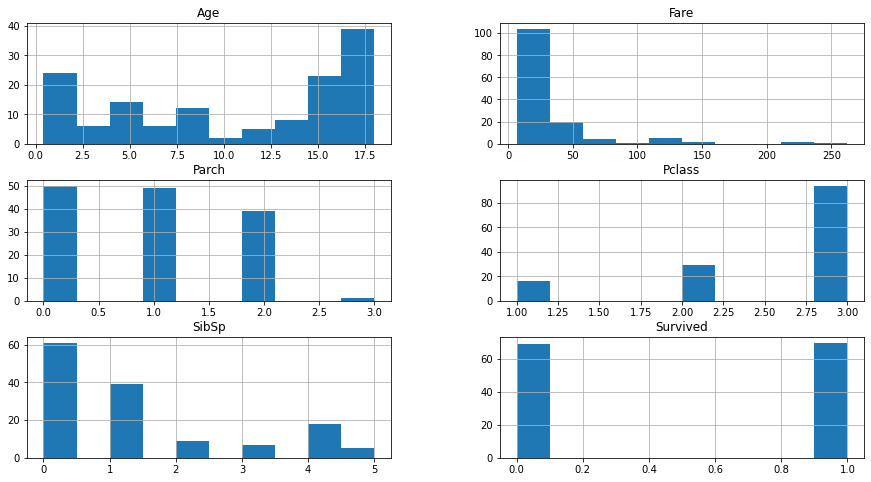

In [11]:
#deversity of numeric features
trainCh[['Age','SibSp','Parch','Fare','Survived','Pclass']].hist(figsize=(15,8))

### Functions

In [12]:
# printing unique values and number of null values and unique values of
# corresponding column
def null_unique_values(col):
    print('Number of Null values in %s column:' %(col), trainCh[col].isnull().sum())
    print('Number of Unique values in %s column:'%(col), trainCh[col].unique().size)
    print('Number of Unique values in %s column:'%(col), trainCh[col].unique())

## Analyzing each Feature

,Age,Fare,Parch,SibSp
Survived,,,,
0,12.268116,25.377055,0.855072,1.811594
1,9.188143,39.522620,1.014286,0.714286


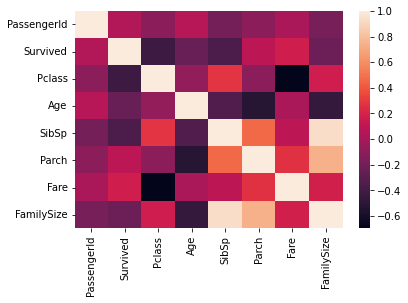

In [101]:
#finding strong corrolation amon features
sns.heatmap(trainCh.corr())
pd.pivot_table(trainCh, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

### Survived

1    70
0    69
Name: Survived, dtype: int64
1    50.359712
0    49.640288
Name: Survived, dtype: float64


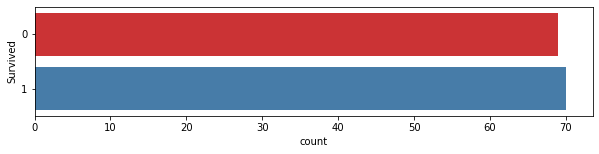

In [448]:
# How many people survived?
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=trainCh, palette ="Set1");
print(trainCh.Survived.value_counts())
print(trainCh.Survived.value_counts()*100/trainCh.shape[0])

### Age

In [14]:
# printing unique values and number of null values and unique values of Age
null_unique_values('Age')

Number of Null values in Age column: 0
Number of Unique values in Age column: 24
Number of Unique values in Age column: [ 2.   14.    4.   15.    8.   18.    3.    7.    5.   11.   17.   16.
  0.83 14.5  12.    9.    1.    0.92 10.   13.    0.75  6.    0.67  0.42]


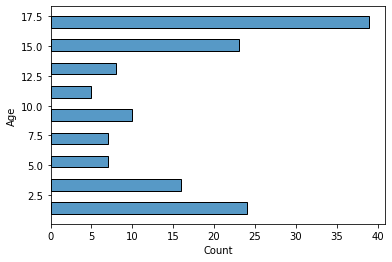

In [15]:
g =sns.histplot(data=trainCh, y='Age', shrink=.5, multiple="dodge")

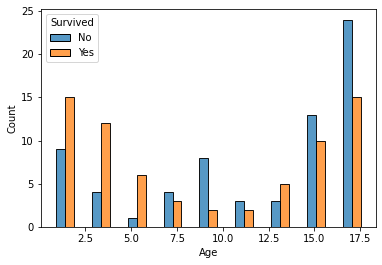

In [16]:

g =sns.histplot(data=trainCh, x='Age', hue='Survived', shrink=.5, multiple="dodge")
leg = g.axes.get_legend()
new_title = 'Survived'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

### Sex

In [17]:
# printing unique values and number of null values and unique values of Sex
null_unique_values('Sex')

Number of Null values in Sex column: 0
Number of Unique values in Sex column: 2
Number of Unique values in Sex column: ['male' 'female']


<AxesSubplot:xlabel='Sex', ylabel='Age'>

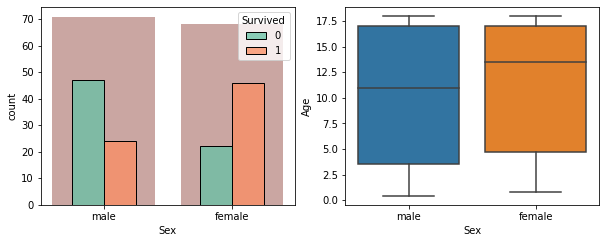

In [18]:
fig= plt.figure(figsize=(10,8))
axs=[fig.add_subplot(2,2,i) for i in range(1,3)]
sns.countplot(ax = axs[0],x ='Sex', data = trainCh,color="salmon", saturation=.3)
sns.histplot(ax = axs[0],data=trainCh, x='Sex', hue='Survived', shrink=0.5, multiple="dodge", palette = "Set2")
sns.boxplot(ax = axs[1],data= trainCh, x= 'Sex',y='Age')

### SibSp, Parch
### and adding a new colum: FamilySize


In [20]:
# printing unique values and number of null values and unique values of SibSp
# parch: number of parents/children aboard the Titanic
# sibsp: number of siblings/spouses aboard the Titanic
null_unique_values('SibSp')
null_unique_values('Parch')

Number of Null values in SibSp column: 0
Number of Unique values in SibSp column: 6
Number of Unique values in SibSp column: [3 1 0 4 2 5]
Number of Null values in Parch column: 0
Number of Unique values in Parch column: 4
Number of Unique values in Parch column: [1 0 2 3]


In [21]:
#feature engineering:
# assign a column Family Size by adding numbers of Sibiling/Spouse and Parent/Childdren
trainCh = trainCh.assign(FamilySize = trainCh.SibSp+trainCh.Parch)
null_unique_values('FamilySize')

Number of Null values in FamilySize column: 0
Number of Unique values in FamilySize column: 8
Number of Unique values in FamilySize column: [4 1 2 0 5 3 7 6]


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

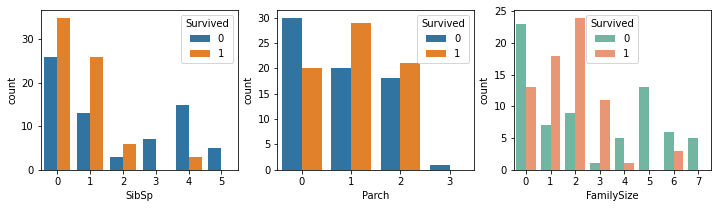

In [22]:
fig= plt.figure(figsize=(12,10))
axs=[fig.add_subplot(3,3,i) for i in range(1,4)]
sns.countplot(ax = axs[0],data=trainCh, x='SibSp',hue='Survived')
sns.countplot(ax = axs[1],data=trainCh, hue='Survived', x='Parch')
sns.countplot(ax = axs[2],data=trainCh, x='FamilySize', hue='Survived', palette = "Set2")

<AxesSubplot:xlabel='count', ylabel='FamilySize'>

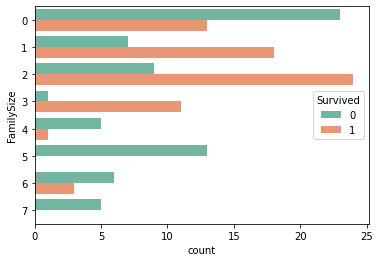

In [23]:
sns.countplot(data=trainCh, y='FamilySize', hue='Survived', palette = "Set2")

array([[<AxesSubplot:title={'center':'FamilySize'}>]], dtype=object)

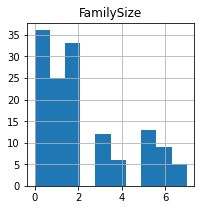

In [24]:
trainCh[['FamilySize']].hist(figsize=(3,3))

 ###### Embarked is the name of ports and Pclass for class of the ticket
C = Cherbourg, Q = Queenstown, S = Southampton

In [25]:
# printing unique values and number of null values and unique values of Embarked
null_unique_values('Embarked')

Number of Null values in Embarked column: 0
Number of Unique values in Embarked column: 3
Number of Unique values in Embarked column: ['S' 'C' 'Q']


<AxesSubplot:xlabel='Fare', ylabel='Count'>

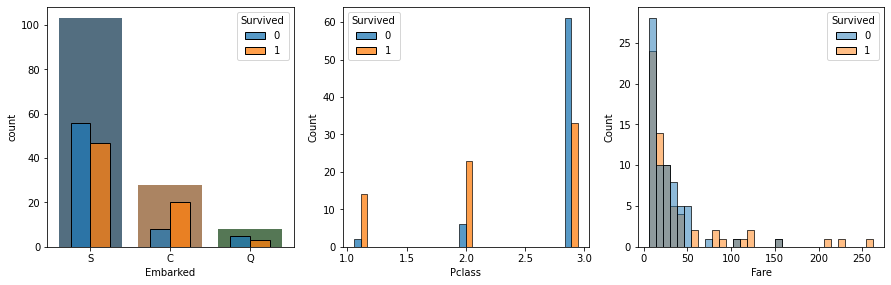

In [26]:
fig= plt.figure(figsize=(15,15))
axs=[fig.add_subplot(3,3,i) for i in range(1,4)]
sns.countplot(ax = axs[0],x='Embarked', data=trainCh, saturation=0.3)
sns.histplot(ax = axs[0],data=trainCh, x='Embarked', hue='Survived', shrink=.5, multiple="dodge")
sns.histplot(ax = axs[1], data=trainCh, x='Pclass', hue='Survived', shrink=.5, multiple="dodge")
sns.histplot(ax = axs[2], data=trainCh, x='Fare', hue='Survived' )


<AxesSubplot:xlabel='Pclass', ylabel='count'>

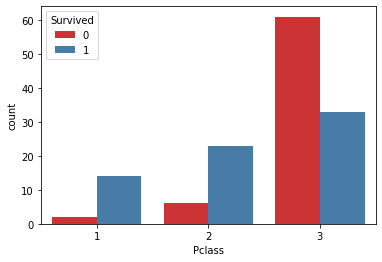

In [446]:
sns.countplot( data=trainCh, x='Pclass', hue='Survived', palette ="Set1")

### Ticket

In [148]:
#print unique value of ticket
trainCh.Ticket.unique()

array(['349909', '237736', 'PP 9549', '350406', '382652', '330923',
       '345764', '2651', 'SC/Paris 2123', '349237', '3101295',
       'C.A. 34651', 'CA 2144', '347088', '3101281', '248738',
       'SO/C 14885', 'W./C. 6608', '2665', '2627', '347082', '7534',
       '231945', '35851', '315093', '363291', '347742', '350404',
       '347077', '230136', '315153', '230080', 'A/5 3540', '347054',
       '367231', 'SOTON/OQ 392089', '236171', 'C.A. 31921', '345778',
       '113781', 'PC 17758', 'PC 17608', '111361', 'C.A. 37671', '2695',
       '3101267', '2653', 'S.O.C. 14879', 'SC 1748', '29106', '250652',
       '345773', '370129', 'STON/O 2. 3101274', '113760', '33638',
       '250644', '2666', '3101298', '315086', '110152', '26360', '2690',
       'F.C.C. 13529', 'C.A. 33112', '17421', 'A/4. 20589', '110413',
       '231919', '365226', '349912', '4138', '350036', '24160', '349256',
       'PC 17757', '2691', '248727', '350048', '2699', 'C.A. 2673',
       '29103', '392096', '250649',

C:\Users\shbpa\anaconda3\envs\AI_comp472\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


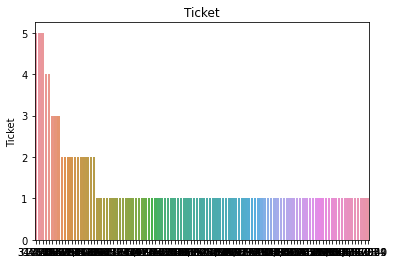

In [199]:
# barplot based on ticket value
sns.barplot(trainCh['Ticket'].value_counts().index,trainCh['Ticket'].value_counts()).set_title('Ticket')
plt.show()

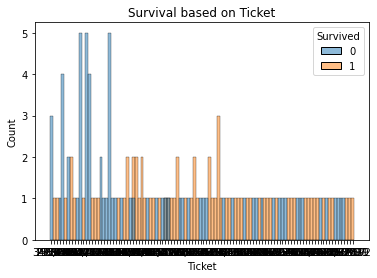

In [200]:

sns.histplot(x=trainCh['Ticket'], hue='Survived', data=trainCh).set_title('Survival based on Ticket')
plt.show()

### Name

In [201]:
#print Name column
#FirstName,Title,LastName
trainCh.Name

7            Palsson, Master. Gosta Leonard
9       Nasser, Mrs. Nicholas (Adele Achem)
10          Sandstrom, Miss. Marguerite Rut
14     Vestrom, Miss. Hulda Amanda Adolfina
16                     Rice, Master. Eugene
                       ...                 
852                 Boulos, Miss. Nourelain
853               Lines, Miss. Mary Conover
855              Aks, Mrs. Sam (Leah Rosen)
869         Johnson, Master. Harold Theodor
875        Najib, Miss. Adele Kiamie "Jane"
Name: Name, Length: 139, dtype: object

### 

### Test data


In [339]:
test= pd.read_csv('test.csv')
test_y = pd.read_csv('gender_submission.csv')
#merge to data set
test=test.assign(Survived=test_y.Survived)

In [340]:
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else '0')

In [341]:
test[['FName','TLName']] = test['Name'].str.split(",",1,expand=True,)
test[['Title','LName']] = test['TLName'].str.split(".",1,expand=True,)
test=test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [342]:
col = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked','numeric_ticket','ticket_letters','Title']

In [343]:
#filtering child datda and adding FamilySize to X_test
X_test= test[test.Age<=18][col]
y_test= test[test.Age<=18]['Survived']
X_test = X_test.assign(FamilySize = X_test.SibSp + X_test.Parch)



In [346]:
X_test.ticket_letters.unique()

array(['0', 'c', 'pc', 'a4', 'pp', 'ca', 'wc', 'a5', 'soc', 'sotonoq',
       'scparis', 'aq3'], dtype=object)

In [344]:
#data engineering:
#replacng categorical values to numerical
X_test.Embarked=X_test.Embarked.map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [348]:
X_test.ticket_letters=X_test.ticket_letters.map( {'0': 0, 'pp': 1, 'scparis': 2,'ca':3, 'soc':4,'wc':5,'a5':6, 'sotonoq':7, 'pc':9,
                                                    'a4':13, 'c':14 ,'aq3':15} ).astype(int)

In [349]:
#data engineering:
#replacng categorical values to numerical
X_test.Title = X_test.Title.map( {'Master':0, 'Mrs':1, 'Miss':2, 'Mr':3} ).astype(int)

In [355]:
X_test.Sex=X_test.Sex.map( {'male': 0, 'female': 1} ).astype(int)

In [350]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'numeric_ticket', 'ticket_letters', 'Title', 'FamilySize'],
      dtype='object')

### Train data and Data Engineering

In [495]:
trainCh[['FName','TLName']] = trainCh['Name'].str.split(",",1,expand=True,)
trainCh[['Title','LName']] = trainCh['TLName'].str.split(".",1,expand=True,)
trainCh=trainCh.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
trainCh.Title=trainCh.Title.map( {'Master':0, 'Mrs':1, 'Miss':2, 'Mr':3} ).astype(int)
trainCh.Title.unique()

array(['Master', 'Mrs', 'Miss', 'Mr'], dtype=object)

In [258]:
trainCh['numeric_ticket'] = trainCh.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
trainCh['ticket_letters'] = trainCh.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else '0')
trainCh.ticket_letters=trainCh.ticket_letters.map( {'0': 0, 'pp': 1, 'scparis': 2,'ca':3, 'soc':4, 'wc':5, 'a5':6, 'sotonoq':7,'sopp':8, 'pc':9,
       'sc':10, 'stono2':11, 'fcc':12, 'a4':13, 'c':14 } ).astype(int)
trainCh.ticket_letters.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13,  8],
      dtype=int64)

In [308]:
# defining X_train and y_train from trainCh dataset
col = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'FamilySize','numeric_ticket','ticket_letters','Title']
y_train = trainCh['Survived']
X_train = trainCh[col]

In [ ]:
#data engineering:
#replacng categorical values to numerical
X_train.Embarked=X_train.Embarked.map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
X_train.Sex=X_train.Sex.map( {'male': 0, 'female': 1} ).astype(int)

### analyzing new featurs


<AxesSubplot:xlabel='ticket_letters', ylabel='count'>

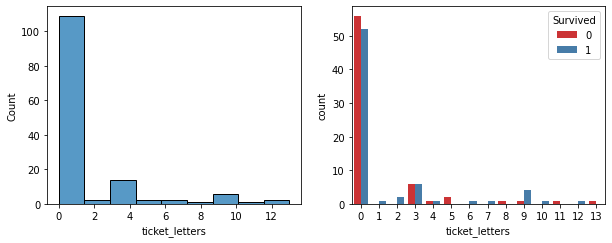

In [497]:
#plot new features
fig= plt.figure(figsize=(10,8))
axs=[fig.add_subplot(2,2,i) for i in range(1,3)]

sns.histplot(ax = axs[0],data= trainCh,x= 'ticket_letters')
sns.countplot(data= trainCh,x= 'ticket_letters',hue='Survived',palette ="Set1")

<AxesSubplot:xlabel='ticket_letters', ylabel='Age'>

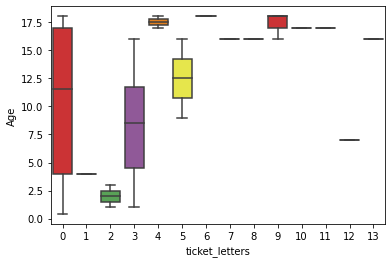

In [499]:
#box plot
sns.boxplot(data= trainCh,x= 'ticket_letters',y='Age',palette ="Set1")

<AxesSubplot:xlabel='Title', ylabel='count'>

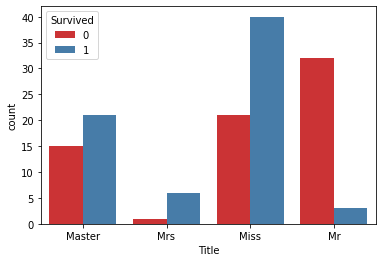

In [496]:
sns.countplot(data= trainCh,x= 'Title',hue='Survived',palette ="Set1")

<AxesSubplot:xlabel='Title', ylabel='Age'>

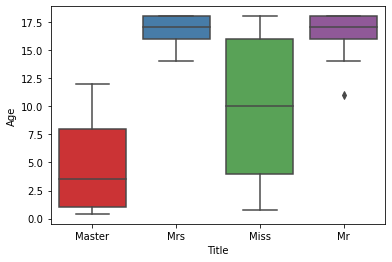

In [498]:
#boxplot title and Age
sns.boxplot(data= trainCh,x= 'Title',y='Age',palette ="Set1")

## Models

In [395]:
# train X_train and y_train to each model 
# print accuracy score of model pretiction for X_train and X_test
def DT(col):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[col], y_train)
    y_pred= clf.predict(X_test[col])
    acc_train = round(clf.score(X_train[col], y_train) * 100, 2)
    print ('DT_train',acc_train)
    print('DT_test',round(accuracy_score(y_test, y_pred)*100,2))
    return clf

#random Forest
def RF(col):
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train[col], y_train)
    y_pred = clf.predict(X_test[col])
    acc_train = round(clf.score(X_train[col], y_train) * 100, 2)
    print ('RF_train',acc_train)
    print('RF_test',round(accuracy_score(y_test, y_pred)*100,2))
    return clf


    
#calling different function to print accuracy of each model
#based on different set of features
def print_accuracy(col):
    DT(col)
    RF(col)
    


In [413]:
#print accuracy of train and test 
#based on different set of features to see if the featur engineering was a good idea or not
col1 = ['Pclass', 'Sex','Age', 'SibSp','Parch','Fare','Embarked','FamilySize','numeric_ticket','ticket_letters','Title']
col2 = ['Pclass', 'Sex','Age', 'SibSp','Parch','Fare','Embarked','FamilySize','numeric_ticket','ticket_letters']
col3 = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'FamilySize','Title']
col0 = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'FamilySize']
col4 = [ 'Sex', 'Age', 'Pclass', 'FamilySize', 'SibSp']
col5 = [ 'Sex', 'Age', 'FamilySize', 'Embarked','Title']
col6 = [ 'Sex', 'Age', 'FamilySize', 'Embarked']
for i in [col1,col2,col3,col0,col4,col5,col6]:
    print('columns:',i)
    print_accuracy(i)
    print()
    

columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'numeric_ticket', 'ticket_letters', 'Title']
DT_train 100.0
DT_test 72.22
RF_train 100.0
RF_test 68.52

columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'numeric_ticket', 'ticket_letters']
DT_train 100.0
DT_test 68.52
RF_train 100.0
RF_test 64.81

columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title']
DT_train 99.28
DT_test 72.22
RF_train 99.28
RF_test 66.67

columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
DT_train 99.28
DT_test 68.52
RF_train 99.28
RF_test 64.81

columns: ['Sex', 'Age', 'Pclass', 'FamilySize', 'SibSp']
DT_train 95.68
DT_test 64.81
RF_train 95.68
RF_test 68.52

columns: ['Sex', 'Age', 'FamilySize', 'Embarked', 'Title']
DT_train 94.24
DT_test 68.52
RF_train 94.24
RF_test 72.22

columns: ['Sex', 'Age', 'FamilySize', 'Embarked']
DT_train 93.53
DT_test 68.52
RF_train 93.53
RF

### Feature importance

In [188]:
# Feature Importance
# the role of each feature in a model and prediction 
def feature_importance(model, X_train):
 
    col = pd.DataFrame({'importent': model.feature_importances_, 'column': X_train.columns})
    col = col.sort_values(['importent', 'column'], ascending=[True, False]).iloc[-30:]
    g=col.plot(kind='barh', x='column', y='importent', figsize=(5, 5),title='Best Model Importance of Features')
    return col

DT_train 100.0
DT_test 72.22


,importent,column
8,0.000000,numeric_ticket
1,0.000000,Sex
4,0.000000,Parch
7,0.000000,FamilySize
6,0.009250,Embarked
0,0.041217,Pclass
9,0.054171,ticket_letters
2,0.129939,Age
5,0.232057,Fare
10,0.235086,Title


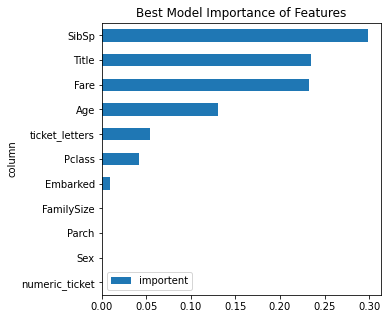

In [414]:
#after data enginnering and adding 3 new columns
feature_importance(DT(col1), X_test[col1])

DT_train 99.28
DT_test 68.52


,importent,column
3,0.000000,SibSp
4,0.004679,Parch
6,0.038236,Embarked
7,0.108984,FamilySize
1,0.109526,Sex
0,0.197252,Pclass
2,0.242921,Age
5,0.298400,Fare


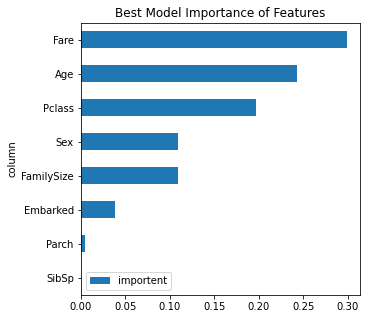

In [417]:
#before data engineering  
feature_importance(DT(col0), X_test[col0])

### Confusion Matrix

RF_train 100.0
RF_test 64.81


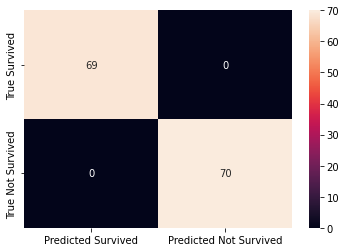

In [436]:
def confusion(model,col):
    #calling the model and fit x train with coresponding feature
    clf = model(col)
    y_pred = clf.predict(X_train[col])

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_train, y_pred)

    true_sur = ['True Survived', 'True Not Survived']
    pre_sur = ['Predicted Survived', 'Predicted Not Survived']

    df_cnf_matrix = pd.DataFrame(cnf_matrix, index = true_sur, columns = pre_sur)

    sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

confusion(RF,col1)